### Домашнее задание №12 по курсу "Машинное обучение"
Головач Андрей

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target[:]

labels = ["Setosa", "Versicolour", "Virginica"]

Setosa      = y == 0
Versicolour = y == 1
Virginica   = y == 2

### t-SNE

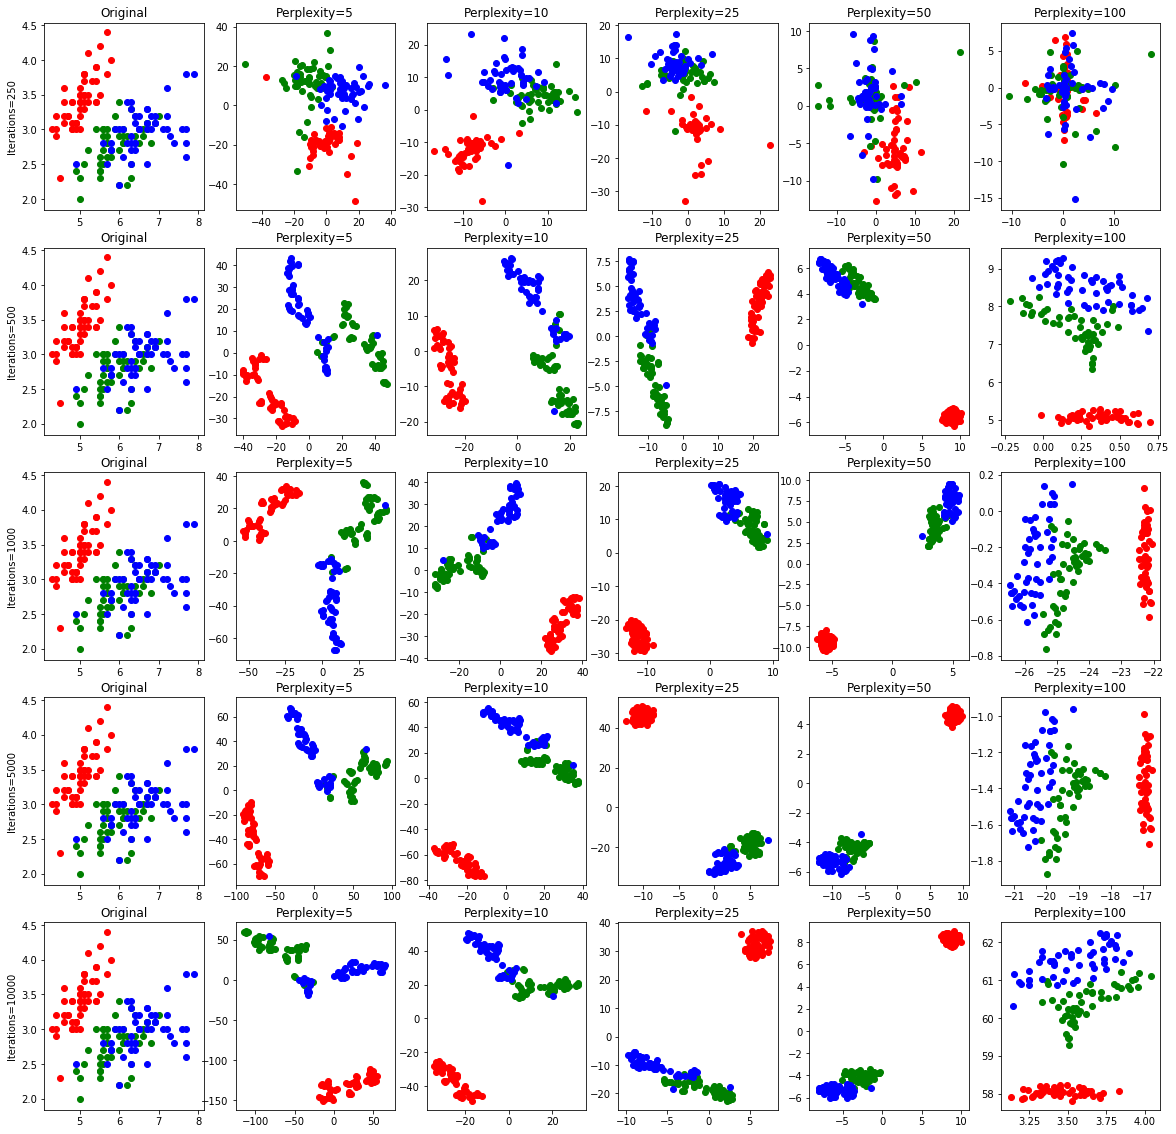

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.ticker import NullFormatter

perplexities = [5, 10, 25, 50, 100]
iterations = [250, 500, 1000, 5000, 10000]
(fig, subplots) = plt.subplots(5, 6, figsize=(20, 20))

for i, iteration in enumerate(iterations):
    ax = subplots[i][0]
    ax.set_title("Original")    
    ax.scatter(X[Setosa, 0],      X[Setosa, 1],      c="r")
    ax.scatter(X[Versicolour, 0], X[Versicolour, 1], c="g")
    ax.scatter(X[Virginica, 0],   X[Virginica, 1],   c="b")
    ax.set_ylabel("Iterations=%d" % iteration)

    for j, perplexity in enumerate(perplexities):
        tNSE = TSNE(n_components=2, learning_rate=200.0, 
                    perplexity=perplexity, n_iter=iteration)
        Y = tNSE.fit_transform(X)

        ax = subplots[i][j + 1]
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[Setosa, 0],      Y[Setosa, 1],      c="r")
        ax.scatter(Y[Versicolour, 0], Y[Versicolour, 1], c="g")
        ax.scatter(Y[Virginica, 0],   Y[Virginica, 1],   c="b")

plt.show()

### PCA

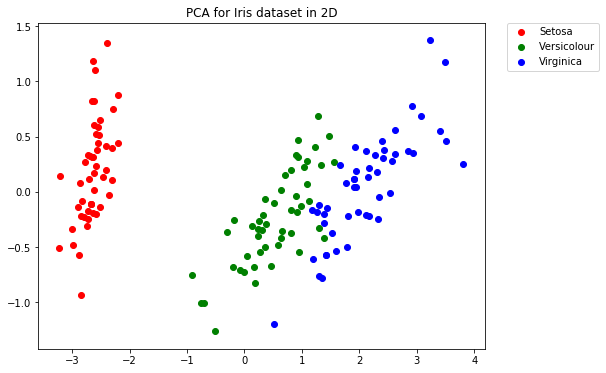

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(X)
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], labels):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, label=target_name)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA for Iris dataset in 2D")
plt.show()

В случае данного датасета мне больше понравилась работа PCA, так как результат работы алгоритма постоянен. Также PCA более уобен отсутствием необходимости подбора параметров. В общем случае, k-SNE выглядит полезнее, т.к. в некоторых случаях может справляться с кластеризацией на тех выборках, где PCA не дает хорошего результата.